In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

alpha = []
energy = []

folder = 'results_COBYLA_N=3_interaction'
files = os.listdir(folder)
files_csv = [file for file in files if file.startswith('shots')]

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

files_csv = sorted(files_csv, key=ordenar_por_numero)


for index, archivo_csv in enumerate(files_csv):

    energy.append([])

    with open(os.path.join(folder, archivo_csv), 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            energy[index].append(float(row[0]))

files_names = [file.split('.')[0] for file in files_csv]

In [2]:
files_names

['shots=16', 'shots=128', 'shots=1024', 'shots=16384']

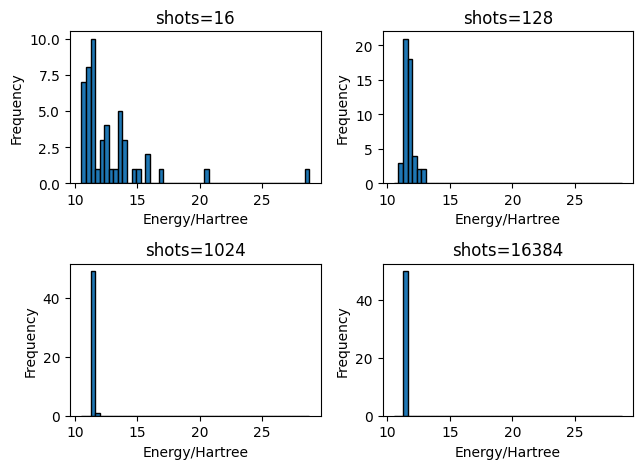

In [3]:
fig, axs = plt.subplots(2, 2)

min_value = min(min(subdata) for subdata in energy)
max_value = max(max(subdata) for subdata in energy)
num_bins = 50
bins = np.linspace(min_value, max_value, num_bins + 1)

for index, ax in enumerate(axs.flat):
    ax.hist(energy[index], bins=bins, edgecolor='black')
    ax.set_title(files_names[index])
    ax.set_xlabel('Energy/Hartree')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(f'{folder}/potential_well')
plt.show()